<a href="https://colab.research.google.com/github/vamsh1/Kaggle_House-prices/blob/master/cse519_hw3_kundhuru_ankitha_112504056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [0]:
#importing pandas and matplot packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder as LE

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data = pd.read_csv('drive/My Drive/Kaggle_HP/train.csv', header = 'infer')
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
#Data cleaning - correction and treatment of null values

train_data.loc[train_data['Alley'].isna(),'Alley']  = "No alley"
train_data.loc[train_data['FireplaceQu'].isna(),'FireplaceQu']  = "No"
train_data.loc[train_data['PoolQC'].isna(),'PoolQC']  = "No"
train_data.loc[train_data['Fence'].isna(),'Fence']  = "No"
train_data.loc[train_data['MiscFeature'].isna(),'MiscFeature']  = "No"
train_data.loc[train_data['GarageCond'].isna(),'GarageCond']  = "No"
train_data.loc[train_data['GarageQual'].isna(),'GarageQual']  = "No"
train_data.loc[train_data['GarageFinish'].isna(),'GarageFinish']  = "No"
train_data.loc[train_data['GarageType'].isna(),'GarageType']  = "No"
train_data.loc[train_data['BsmtFinType2'].isna(),'BsmtFinType2']  = "No"
train_data.loc[train_data['BsmtFinType1'].isna(),'BsmtFinType1']  = "No"
train_data.loc[train_data['BsmtExposure'].isna(),'BsmtExposure']  = "No"
train_data.loc[train_data['BsmtCond'].isna(),'BsmtCond']  = "No"
train_data.loc[train_data['BsmtQual'].isna(),'BsmtQual']  = "No"

In [0]:
#Treatment of missing values - replace with median

#impute_values = sklearn.preprocessing.Imputer(strategy='most_frequent', copy=False)
#impute_values.fit(train_data)


for col in train_data.columns:
  train_data[col].fillna(value = train_data[col].mode(), inplace = True)


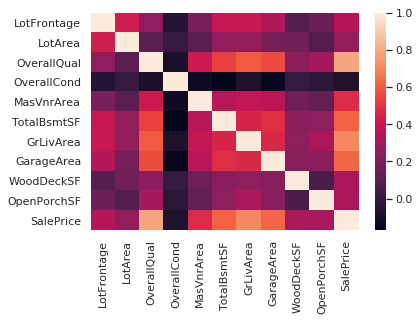

In [0]:
# TODO: show visualization
interesting_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
                        'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']

subset1 = pd.DataFrame(train_data, columns=interesting_features)
corr = subset1.corr()
sns.heatmap(corr)
plt.show()

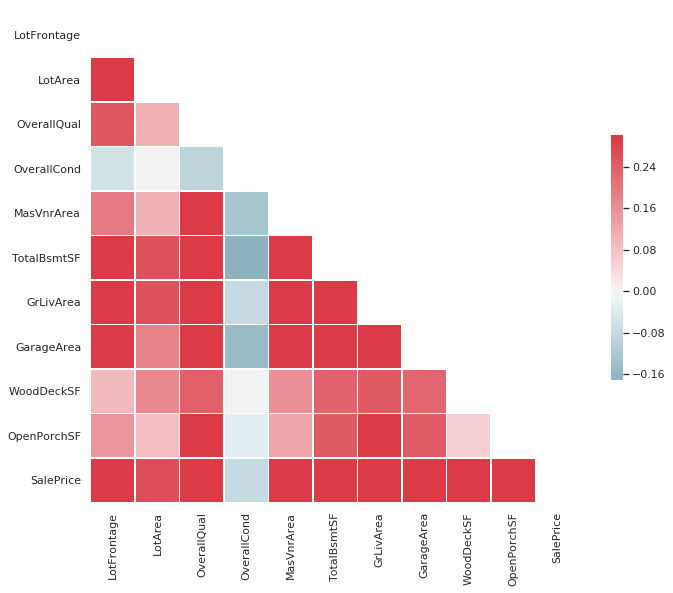

In [0]:
#TO generate a masked correlation heatmap

sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#with sns.axes_style("white"):
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Discuss most positive and negative correlations.

## Part 2 - Informative Plots

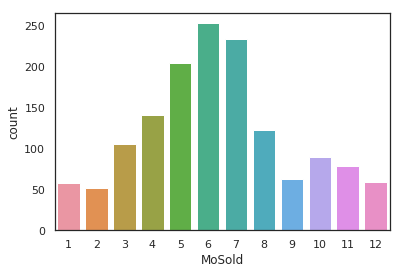

In [0]:
#to visualize data distribution in columns
sns.countplot(x= 'MoSold', data = train_data)
plt.show()


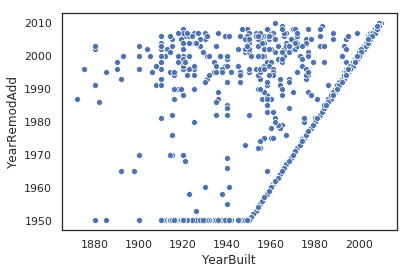

In [0]:
# TODO: code to generate Plot 1 (ScatterPlot)
ax = sns.scatterplot(x="YearBuilt", y="YearRemodAdd", data=train_data)


What interesting properties does Plot 1 reveal?

This scatterplot shows year house is remodelled vs year the house is built. Interesting property to notice is that most of the older homes are remodelled, and in fact all houses built before 1950 are remodelled (plot shows no remodel data before 1950). Visually, it can be observed most of the remodelling is done after 1990.

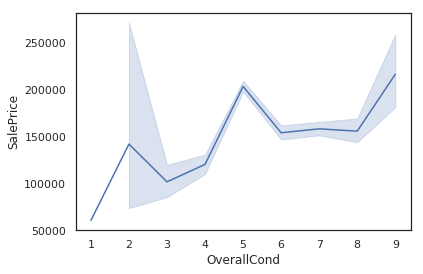

In [0]:
# TODO: code to generate Plot 2 (LinePlot)
#ax = sns.lineplot(x="OverallCond", y="OverallQual", data=train_data)

ax = sns.lineplot(x="OverallCond", y="SalePrice", data=train_data)

What interesting properties does Plot 2 reveal?

Better conditioned home do not necessarily have higher Sale Price. Especially for homes in poor condition (<3), there is strong negative relationship between overall condition and Sale price. Also, the overall correlation between overall condition and Sale price is negative. This indicates that the variables related to condition of the home might be less important.

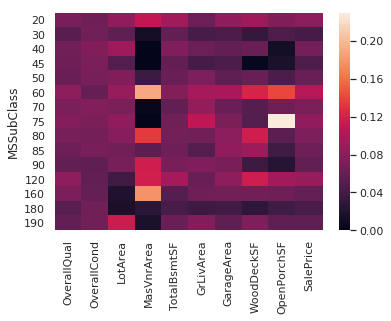

In [0]:
# TODO: code to generate Plot 3 (HeatMap)
def df_column_normalize(dataframe, percent=False):
    '''Normalizes the values of a given pandas Dataframe by the total sum of each column'''
    if percent:
        return dataframe.div(dataframe.sum(axis=0), axis=1)*100
    else:
        return dataframe.div(dataframe.sum(axis=0), axis=1)


grouped = train_data.groupby(by = 'MSSubClass')
data = grouped.mean()[['OverallQual', 'OverallCond', 'LotArea','MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

data = df_column_normalize(data)

sns.heatmap(data)

What interesting properties does Plot 3 reveal?

Lot of variation in LotArea, MasVnrArea, OpenPorchSF, WooddeckSF. Not so much in GarageArea, overall qual and cond, BsmtSF. SalePrice is varying.

In [0]:
# TODO: code to generate Plot 4

What interesting properties does Plot 4 reveal?

In [0]:
# TODO: code to generate Plot 5

What interesting properties does Plot 5 reveal?

## Part 3 - Handcrafted Scoring Function

In [0]:
# TODO: code for scoring function

#The handcrafted scoring function is constructed by handpicking important features and assigning weights to them by importance.
#The average SalePrice of each feature corresponding to the house is used to obtain the final predicted SalePrice(weighted avg of avgs)

#score_features = ['MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual', 'YearRemodAdd',  'YrSold', 'MiscVal']

f1 = train_data.groupby(by = 'MSSubClass').mean()['SalePrice']
f2 = (train_data['LotArea']/train_data['SalePrice']).mean()
f3 = train_data.groupby(by = 'Neighborhood').mean()['SalePrice']
f4 = train_data.groupby(by = 'OverallQual').mean()['SalePrice']
f5 = train_data.groupby(by = 'YearRemodAdd').mean()['SalePrice']
f6 = train_data.groupby(by = 'YrSold').mean()['SalePrice']
f7 = train_data.mean()['MiscVal']



In [0]:
#implementing the function
def scoring_function(H):
    return (0.2*f1[H['MSSubClass']] + 0.3*f2*H['LotArea'] + 0.2*f3[H['Neighborhood']] + 0.2*f4[H['OverallQual']]
            + 0.05*f5[H['YearRemodAdd']] + 0.05*f6[H['YrSold']] + (H['MiscVal']-f7))

In [0]:
predicted = scoring_function(train_data.iloc[610])

print(predicted, train_data.iloc[610]['SalePrice'] )

179539.58823724138 313000


What is the ten most desirable houses?

What is the ten least desirable houses?

Describe your scoring function and how well you think it worked.

## Part 4 - Pairwise Distance Function

In [0]:
# TODO: code for distance function

How well does the distance function work? When does it do well/badly?

## Part 5 - Clustering

In [0]:
# TODO: code for clustering and visualization

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

## Part 6 - Linear Regression

In [0]:
# TODO: code for linear regression

features = ['LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
            'GarageArea', 'SalePrice', '1stFlrSF','2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea', 'YearBuilt','YearRemodAdd', 'LotShape']

X = pd.DataFrame(train_data, columns=features)

#X['LotShape'] = X['LotShape'].astype('category')
X['LotShape'] = X['LotShape'].factorize(['Reg', 'IR1', 'IR2', 'IR3'])[0]

#X['LotShape'] = LE.fit_transform(X['LotShape'].astype('int'))

#print(X['LotShape'].cat.codes)
#X['OtherSF'] = train_data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis = 1)

X.dtypes

#X = X.astype('float64')
y = np.log(X["SalePrice"])

X = X.drop('SalePrice', axis = 1)


In [0]:
model = LinearRegression().fit(X, y)
print(model.score(X,y))

model.coef_


ValueError: ignored

How well/badly does it work? Which are the most important variables?

## Part 7 - External Dataset

In [0]:

# TODO: code to import external dataset and test


Describe the dataset and whether this data helps with prediction.

## Part 8 - Permutation Test

In [0]:
# TODO: code for all permutation tests

Describe the results.

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: FILL HERE

Highest Rank: FILL HERE

Score: FILL HERE

Number of entries: FILL HERE

INCLUDE IMAGE OF YOUR KAGGLE RANKING